# Dataset:
You will be working with two datasets: Train and Test, both containing images of 40 individuals. Each dataset has been preprocessed for this assignment.

In [24]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler



#1.1a Create PCA function that takes two inputs: dataset, and k= number of principle component, and return the transform data

In [25]:
### Necessary functions prior to questions.
def my_pca(Data, k):
    data_centered = Data - np.mean(Data, axis=0)

    # Calculate the covariance matrix
    cov_matrix = np.cov(data_centered, rowvar=False)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project the data onto the selected components
    data_pca = np.dot(data_centered, eigenvectors[:, :k])
    return data_pca

# Function to perform classification
def dis(x1, x2):
    return np.linalg.norm(x1 - x2)

def myclassifier(Train, Trainlabel, Test):
    " Train is the training data"
    " Trainlabel is the training labels"
    " Test is the testing data"
    pred = []
    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint, trainpoint))
        pred.append(np.argmin(pred_dis))
    return np.array(pred)


# Read your TrainData and Test data. Try to remove the last column of the training data and assign it to one variable, do same thing for the TestData

In [26]:
# write the code here,read in train data and test data
Traindata = pd.read_csv('TrainData.csv')
Testdata = pd.read_csv('TestData.csv')
num_rows_train,num_columns_train = Traindata.shape
num_rows_test,num_columns_test= Testdata.shape
#both datasets are of same size 1034 attributes, last is label
print(f"The training data has {num_rows_train} rows and {num_columns_train} columns.")
print(f"The test data has {num_rows_test} rows and {num_columns_test} columns.")
#######

Y_train=Traindata.iloc[:,-1]           #label train column
Train=Traindata.iloc[:,:-1].to_numpy()
Y_test=Testdata.iloc[:,-1]            #label train column
Test=Testdata.iloc[:,:-1].to_numpy()

The training data has 200 rows and 10305 columns.
The test data has 200 rows and 10305 columns.


In [27]:
min_value = np.min(Train)
max_value = np.max(Train)

print(f"Minimum value in the dataset: {min_value}")
print(f"Maximum value in the dataset: {max_value}")


Minimum value in the dataset: 0
Maximum value in the dataset: 255


Notice that each of our values in this data set are between 0 and 255 inclusive. Each image is a flattened 1D array(2D grid becoming  1D grid), where each image is of size 112x92. As each row is being read (each of 92 pixels), we write each pixel's intensity value. Move down to the next row and do the same and repeat the processfor all 112 rows. By the end we should have the intensity values of 112*92=10304 pixels. That is, the first column contains the intensity of the top-left pixel for all images. The second column contains the intensity of the second pixel from the left in the top most row for all images, etc.

# 1.1b and 1.1c Apply your PCA implementation to the Train dataset to reduce the dimensionality of the images. Chose the apropriate number of principal components to retain a significant amount of variance.

First we will determine the k value by plotting the scree plot. This will involve claculating the eigeinvalues and eigenvectors shown below. Calculating all eigenvalues is computationally intensive.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


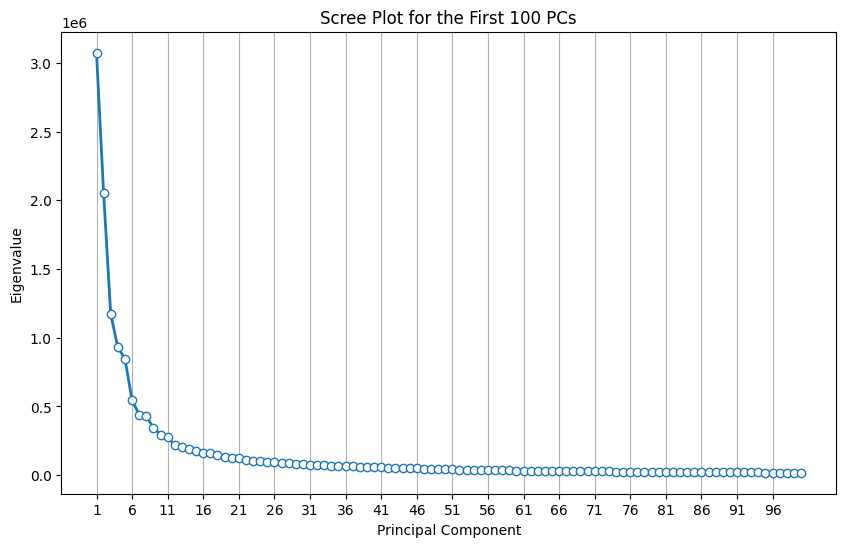

In [28]:
data_centered = Train - np.mean(Train, axis=0)
cov_matrix = np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


#scree plot
plt.figure(figsize=(10,6))
# Plot only the first 100 eigenvalues
plt.plot(range(1, 101), eigenvalues[:100], 'o-', markerfacecolor='w', linewidth=2)

plt.title('Scree Plot for the First 100 PCs')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# Display ticks for the first 100 PCs on the x-axis
plt.xticks(ticks=range(1, 101,5))
plt.grid(axis='x')
plt.show()



Compare Scree Graph with the PCA accuracy vs Components graph.

In [ ]:
def euclidean_distance(x1, x2):
    """Compute the Euclidean distance between two vectors."""
    return np.linalg.norm(x1 - x2)

def nearest_neighbor_classifier(train_data, train_labels, test_data):
    """1-nearest neighbor classifier."""
    predictions = []
    for test_point in test_data:
        # Calculate distances between the test point and all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in train_data]
        # Find the label of the nearest training point
        nearest_neighbor_label = train_labels[np.argmin(distances)]
        predictions.append(nearest_neighbor_label)
    return np.array(predictions)

def calculate_accuracy(true_labels, predicted_labels):
    """Calculate classification accuracy."""
    correct = np.sum(true_labels == predicted_labels)
    total = len(true_labels)
    return correct / total


def pca_accuracy_vs_components(Train, Y_train, Test, Y_test, max_components):
    accuracies = []
    # Iterate over number of principal components
    for k in range(1, max_components + 1):
        # Apply PCA
        pca = PCA(n_components=k)
        pca.fit(Train)
        reduced_train = pca.transform(Train)
        reduced_test = pca.transform(Test)

        # Use 1-NN for classification
        predictions = nearest_neighbor_classifier(reduced_train, Y_train, reduced_test)

        # Calculate accuracy
        accuracy = calculate_accuracy(Y_test, predictions)
        accuracies.append(accuracy * 100)  # multiply by 100 to get percentage

    # Plot the accuracies
    plt.plot(range(1, max_components + 1), accuracies)
    plt.xlabel("Number of Principal Components (k)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy vs. Number of Principal Components")
    plt.grid(True)
    plt.show()

# Now, call the function with your data
pca_accuracy_vs_components(Train, Y_train, Test, Y_test, 75)



There are two different approaches for picking the k value. In this case it might be wise to approach of which value of k to choose based off of a combination of methods.

If we look at the resulting scree plot, picking 6 as the number of principal components seems to be a reasonable choice if we base our approach on picking k by the difference in variance explained (the different seems to be minimal after k=6-8). However we should note that at k=6 the graph does not fully 'leveled off', which brings me to our second approach of picking k.

We can consider the model performance method as an appropriate method to determine an ideal k value. Here we apply the PCA on teh training data to reduce its dimensionality to k, then we transofrm bot hthe training and test data using the learned PCA components. Next we use the the classifier function (based off of the KNN) to classify the transformed test data based on the transformed training data. Finally we compute the accuracy of these classifications and append the accuracies to the 'accuracies' list. After processing all of the values of k, we plut the accuracies against the number of principal components used.

We notice that the accuracies tend to level off at around k=35. After about k=30-35 components chosen, the increase in k does not have a substantial effect on accuracy. As this model hasn't been tested for overfitting, we're inclined to chose th k value where the graph begins to level off, which is around k=35. Opting for a larger k might risk overfitting. However, given our likely goal of predictive modeling -- matching pictures from teh training data to their respective test data images -- we should select the large k value.

Hence we choose k=35.


#PCA implementation to the train data set for k=35.

In [29]:
print("Here is the PCA implementation to the train data set for k=35. Please keep in mind that this implementation is computationally intensive")
print(my_pca(Train, 35))

Here is the PCA implementation to the train data set for k=35. Please keep in mind that this implementation is extremly computationally
[[-1362.40471908+0.j -1410.01500067+0.j  1786.8754089 +0.j ...
    414.57274318+0.j   146.87374309+0.j   216.18856505+0.j]
 [-2903.70161117+0.j -1135.07676178+0.j  -313.628798  +0.j ...
   -193.0047435 +0.j  -509.17093186+0.j   547.92524229+0.j]
 [-2572.25743345+0.j  -808.30460733+0.j   795.65905864+0.j ...
   -323.8888713 +0.j   571.63229886+0.j   418.33306787+0.j]
 ...
 [ 1292.41733442+0.j  -826.52299566+0.j  -421.53541979+0.j ...
   -579.79460414+0.j   151.91198734+0.j   -42.7932769 +0.j]
 [ 1096.66971391+0.j -1351.82682683+0.j  -257.26877143+0.j ...
   -324.02351289+0.j   359.80448124+0.j    96.27796541+0.j]
 [ 1425.95118228+0.j -1602.35752062+0.j  -185.81817133+0.j ...
   -371.3536836 +0.j    85.09745959+0.j  -199.1219915 +0.j]]


#1.2a/b.... Apply PCA to the Train dataset using sklearn. We will also visualize these images. Here we have 35 eigenfaces which although may appear blurry, it gives the representation of the primary ways in which the training data set varies.

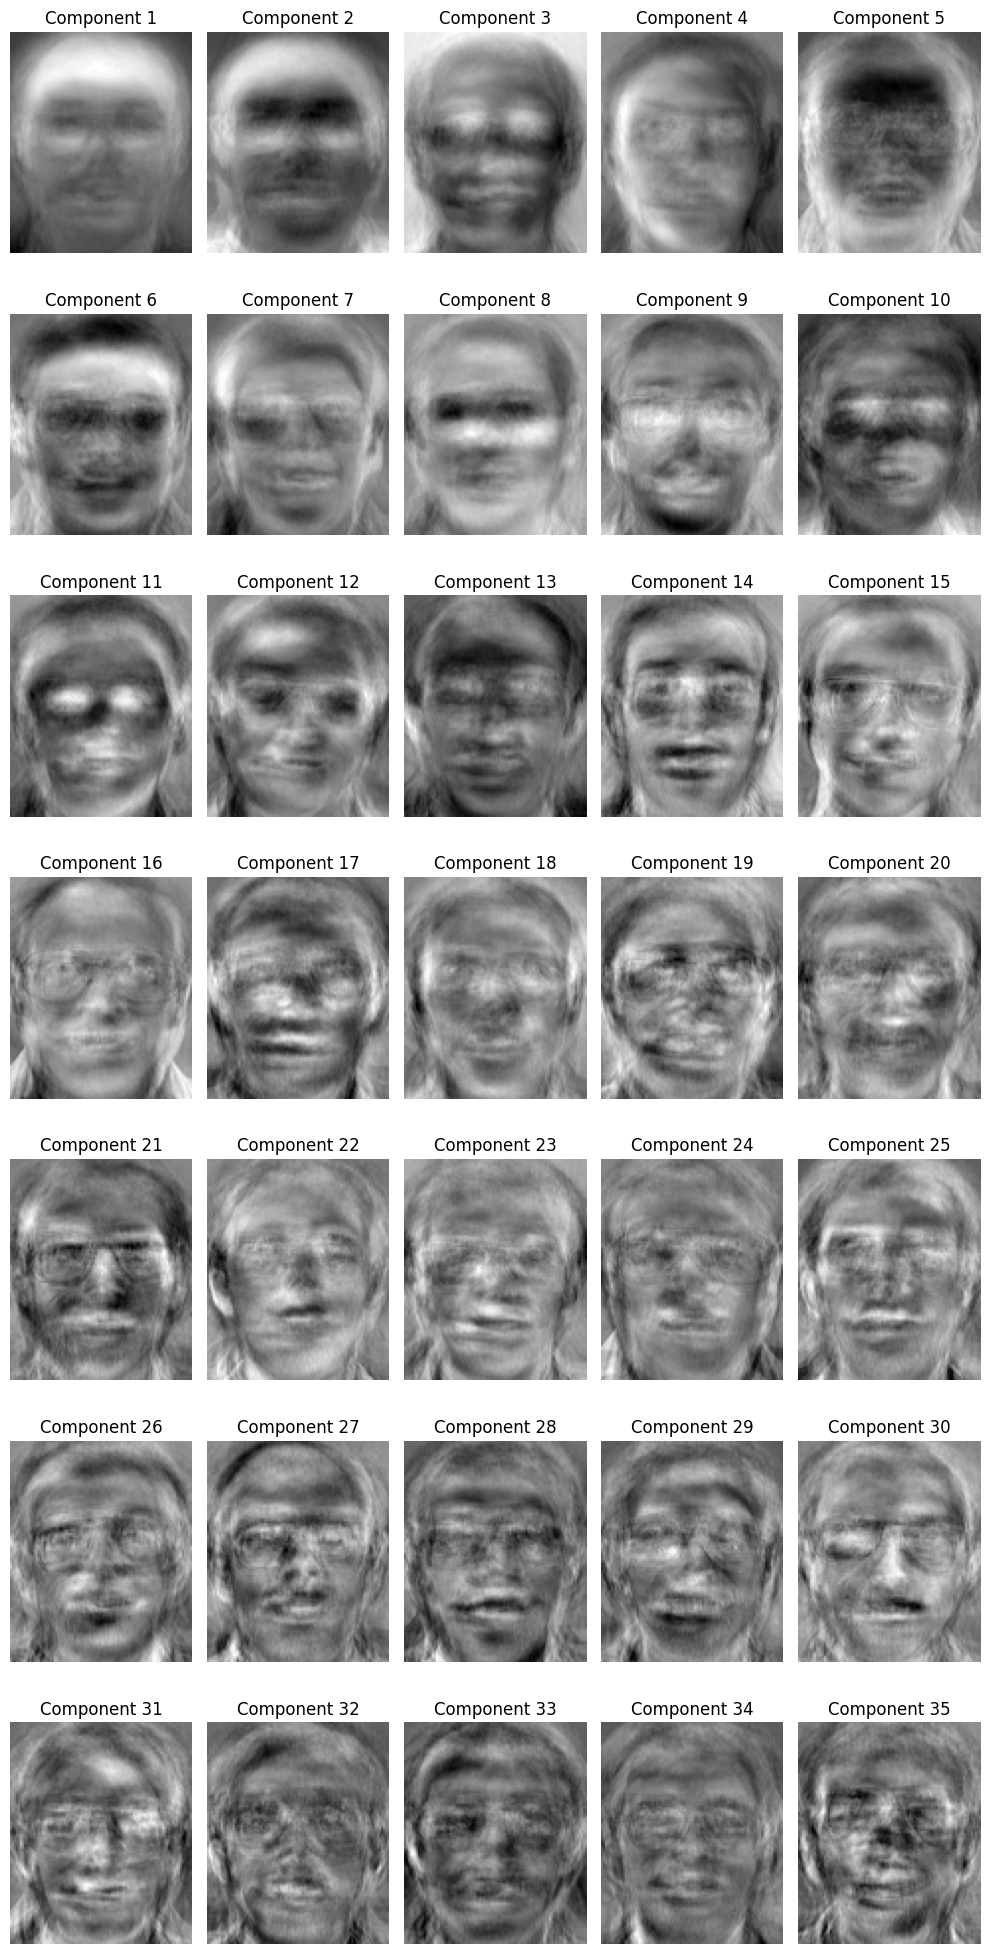

In [30]:


# Fit PCA on Train data
k = 35
pca = PCA(n_components=k)
pca.fit(Train)

# Extract the principal components (eigenvectors)
components = pca.components_

# Visualize the components
plt.figure(figsize=(10, 20))
for i, component in enumerate(components, 1):
    plt.subplot(7, 5, i)  # 7 rows and 5 columns for displaying
    component_image = component.reshape(112, 92)  # Adjust the shape based on your dataset's image dimensions
    plt.imshow(component_image, cmap="gray")
    plt.title(f"Component {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()
#Eigenfaces below.

[ 46  35  85   7  94 192 124  44]

In [ ]:
print(eigenvalues)


[ 3.07498354e+06+0.j  2.05085384e+06+0.j  1.17062234e+06+0.j ...
 -1.04163426e-10+0.j -1.30506323e-10+0.j -2.48967149e-10+0.j]


In [31]:

# Initialize PCA with k components
k = 35
pca = PCA(n_components=k)
# Fit the PCA on your data
pca.fit(Train)
# Transform the data using the learned PCA components
Train_pca = pca.transform(Train)
print(Train_pca)



[[ 1.36240472e+03 -1.41001502e+03 -1.78687549e+03 ... -4.80844950e+02
  -3.42393042e+02  2.17450865e+01]
 [ 2.90370162e+03 -1.13507680e+03  3.13628607e+02 ... -1.87456311e+02
   2.80306316e+02  6.46913966e+02]
 [ 2.57225744e+03 -8.08304627e+02 -7.95658967e+02 ...  3.19874547e+02
  -5.73615471e+02  1.93554798e+02]
 ...
 [-1.29241733e+03 -8.26523001e+02  4.21535463e+02 ...  6.14991679e+02
   1.79265090e+00  9.37373117e+01]
 [-1.09666971e+03 -1.35182682e+03  2.57268827e+02 ...  4.42995728e+02
  -2.23149819e+02  2.31830642e+02]
 [-1.42595118e+03 -1.60235752e+03  1.85818146e+02 ...  4.19699309e+02
   5.06237901e+01 -8.67575907e+01]]



#2.1a/2.2a/2.3a.
Implement Kernel PCA with the Radial Basis, Polynomial, and Linear Function from scratch.



Here we are asked to implement the kPCA with the RBF,polynomial, and linear kernel by scratch.This satisfies 2.1a,2.2a,2.3a.

In [32]:
#K(x,y)=exp(-y ||x-y||^2)
def rbf_kernel(x, y, gamma=1.0):
    """Radial Basis Function (RBF) kernel."""
    distance = np.linalg.norm(x - y) ** 2
    return np.exp(-gamma * distance)

#K(x,y)=(xy+1)^d
def poly_kernel(x, y, degree=3):
    """Polynomial kernel."""
    return (np.dot(x, y) + 1) ** degree

#K(x,y)=xy
def linear_kernel(x, y):
    """Linear kernel."""
    return np.dot(x, y)

def my_kpca(data, n_components, kernel_type='rbf', kernel_param=1.0):
    """
    Kernel Principal Component Analysis (KPCA) function.

    Parameters:
    - data: Input data as an ndarray of shape (n_samples, n_features).
    - n_components: Number of principal components to retain.
    - kernel_type: Type of kernel ('rbf', 'poly', or 'linear').
    - kernel_param: Kernel parameter (e.g., gamma for RBF, degree for polynomial).

    Returns:
    - Transformed data in the KPCA space.
    """
def my_kpca(data, n_components, kernel_type='rbf', kernel_param=1.0):
    """Kernel Principal Component Analysis (KPCA) function."""
    epsilon=1e-10
    # Step 1: Compute the Kernel Matrix
    n_samples = data.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            if kernel_type == 'rbf':
                K[i, j] = rbf_kernel(data[i], data[j], gamma=kernel_param)
            elif kernel_type == 'poly':
                K[i, j] = poly_kernel(data[i], data[j], degree=kernel_param)
            elif kernel_type == 'linear':
                K[i, j] = linear_kernel(data[i], data[j])

    # Step 2: Center the Kernel Matrix
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Step 3: Obtain eigenvalues & eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(K)

    # Step 4: Sort eigenvalues & eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]
    #Filter out near zero eigenvalues
    valid_indices = eigenvalues > epsilon
    eigenvectors = eigenvectors[:, valid_indices]
    eigenvalues = eigenvalues[valid_indices]

    # Step 5: Choose top n_components
    alphas = np.column_stack([eigenvectors[:, i] for i in range(min(n_components, sum(valid_indices)))])
    lambdas = [eigenvalues[i] for i in range(min(n_components, sum(valid_indices)))]

    return alphas / np.sqrt(lambdas)

#2.1b/2.2b/2.3b
Apply the kPCA implementation to the Train dataset


kpca with k=35, and kernal type = rbf.

In [33]:
kpca_rbf=my_kpca(Train, n_components=35, kernel_type='rbf',kernel_param=1.0)
print(kpca_rbf)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.04949934  0.03486365 -0.01006319 ... -0.0357281   0.00469144
   0.00801342]
 [-0.04148613  0.0365139   0.00039496 ... -0.02853559  0.01342495
  -0.0160467 ]
 ...
 [-0.09397751 -0.05439386  0.03435472 ...  0.0060455   0.0646836
  -0.04023793]
 [ 0.00502257  0.0319667   0.0026725  ...  0.02482759 -0.00986967
  -0.00210724]
 [ 0.02221859 -0.04979229 -0.031581   ... -0.07636296  0.03714091
  -0.01185517]]


kpca with k=35, and kernal type = polynomial.

In [34]:
kpca_poly=my_kpca(Train, n_components=35, kernel_type='poly',kernel_param=1.0)
print(kpca_poly)

[[-2.22643627e-06  3.45490370e-06  7.67051262e-06 ... -2.96765109e-05
   1.09918811e-05  1.65081605e-05]
 [-4.74521740e-06  2.78123347e-06 -1.34631303e-06 ...  1.38159285e-05
  -3.81058332e-05  4.18395758e-05]
 [-4.20357267e-06  1.98055665e-06  3.41552233e-06 ...  2.31850545e-05
   4.27803782e-05  3.19439163e-05]
 ...
 [ 2.11206317e-06  2.02519644e-06 -1.80952334e-06 ...  4.15036473e-05
   1.13689382e-05 -3.26769496e-06]
 [ 1.79217320e-06  3.31232754e-06 -1.10437658e-06 ...  2.31946926e-05
   2.69274004e-05  7.35178620e-06]
 [ 2.33028364e-06  3.92619294e-06 -7.97660890e-07 ...  2.65827453e-05
   6.36860708e-06 -1.52049568e-05]]


kpca with k=35 and kernal type = linear

In [35]:
kpca_linear=my_kpca(Train, n_components=35, kernel_type='linear',kernel_param=1.0)
print(kpca_linear)

[[-2.22643627e-06  3.45490370e-06  7.67051262e-06 ... -2.96765109e-05
   1.09918811e-05  1.65081605e-05]
 [-4.74521740e-06  2.78123347e-06 -1.34631303e-06 ...  1.38159285e-05
  -3.81058332e-05  4.18395758e-05]
 [-4.20357267e-06  1.98055665e-06  3.41552233e-06 ...  2.31850545e-05
   4.27803782e-05  3.19439163e-05]
 ...
 [ 2.11206317e-06  2.02519644e-06 -1.80952334e-06 ...  4.15036473e-05
   1.13689382e-05 -3.26769496e-06]
 [ 1.79217320e-06  3.31232754e-06 -1.10437658e-06 ...  2.31946926e-05
   2.69274004e-05  7.35178620e-06]
 [ 2.33028364e-06  3.92619294e-06 -7.97660890e-07 ...  2.65827453e-05
   6.36860708e-06 -1.52049568e-05]]


kpca with k=35 and kernal type = linear

In [36]:
kpca_linear=my_kpca(Train, n_components=35, kernel_type='linear',kernel_param=1.0)
print(kpca_linear)

[[-2.22643627e-06  3.45490370e-06  7.67051262e-06 ... -2.96765109e-05
   1.09918811e-05  1.65081605e-05]
 [-4.74521740e-06  2.78123347e-06 -1.34631303e-06 ...  1.38159285e-05
  -3.81058332e-05  4.18395758e-05]
 [-4.20357267e-06  1.98055665e-06  3.41552233e-06 ...  2.31850545e-05
   4.27803782e-05  3.19439163e-05]
 ...
 [ 2.11206317e-06  2.02519644e-06 -1.80952334e-06 ...  4.15036473e-05
   1.13689382e-05 -3.26769496e-06]
 [ 1.79217320e-06  3.31232754e-06 -1.10437658e-06 ...  2.31946926e-05
   2.69274004e-05  7.35178620e-06]
 [ 2.33028364e-06  3.92619294e-06 -7.97660890e-07 ...  2.65827453e-05
   6.36860708e-06 -1.52049568e-05]]


#3.1 Applying PCA and kPCA to the Test  Dataset.
Use the PCA and KPCA models (RBF and Polynomial) trained on the test dataset to transform the Test dataset.  

kPCA with rbf and polynomial kernel

#3.2 (a,b)...

In [37]:


# Scale the data
scaler = StandardScaler()
Train_scaled = scaler.fit_transform(Train)
Test_scaled = scaler.transform(Test)  # Use the same scaler object to transform the test set

# Transform Train data using KernelPCA with RBF kernel
kpca_rbf = KernelPCA(n_components=35, kernel='rbf')
Train_kpca_rbf = kpca_rbf.fit_transform(Train_scaled)
Test_kpca_rbf = kpca_rbf.transform(Test_scaled)

# Transform Train data using KernelPCA with Polynomial kernel
kpca_poly = KernelPCA(n_components=35, kernel='poly')
Train_kpca_poly = kpca_poly.fit_transform(Train_scaled)
Test_kpca_poly = kpca_poly.transform(Test_scaled)


3.2 A/B
Here we will evaluate the classification (using NCC classifier) performance using accuracy metrics for kPCA ( rbf, and polynnomial). Like the KNN, the NCC is a linear classifier,which makes for a bad choice when using kPCA. However, we pick NCC ove KNN because KNN suffers from the curse of dimensionality (There is a total of 10,305 features). You will notice below that the difference in performance is minimal. See conclusion for a better choice for a classifier.

In [38]:
unique_labels = np.unique(Y_train)
centroids_poly = {}
centroids_rbf = {}

for label in unique_labels:
    centroids_poly[label] = np.mean(Train_kpca_poly[Y_train == label], axis=0)
    centroids_rbf[label] = np.mean(Train_kpca_rbf[Y_train == label], axis=0)
def classify(sample, centroids):
    min_distance = float('inf')
    prediction = None
    for label, centroid in centroids.items():
        distance = np.linalg.norm(sample - centroid)
        if distance < min_distance:
            min_distance = distance
            prediction = label
    return prediction

predictions_poly = [classify(sample, centroids_poly) for sample in Test_kpca_poly]
predictions_rbf = [classify(sample, centroids_rbf) for sample in Test_kpca_rbf]

accuracy_poly = np.sum(np.array(predictions_poly) == Y_test) / len(Y_test)
accuracy_rbf = np.sum(np.array(predictions_rbf) == Y_test) / len(Y_test)

print(f"Accuracy with KPCA (Polynomial Kernel): {accuracy_poly * 100:.2f}%")
print(f"Accuracy with KPCA (RBF Kernel): {accuracy_rbf * 100:.2f}%")



Accuracy with KPCA (Polynomial Kernel): 65.50%
Accuracy with KPCA (RBF Kernel): 77.50%


Notice that for k=35, the accuracy is quite low. If we deciide to run a for loop and test values from k=1 to k=75, our results will be similar.



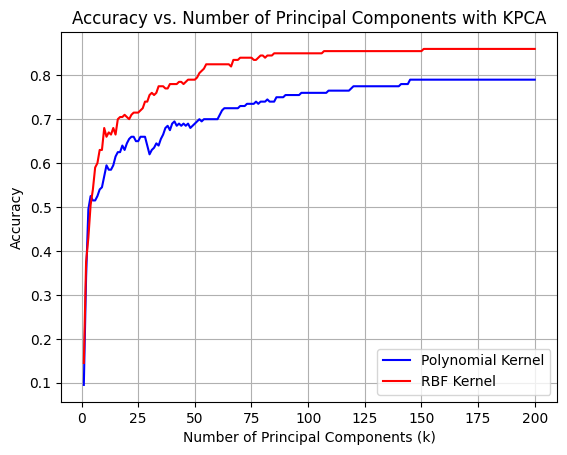

In [39]:
# Scale the data
scaler = StandardScaler()
Train_scaled = scaler.fit_transform(Train)
Test_scaled = scaler.transform(Test)

max_k = min(Train_scaled.shape[0], Train_scaled.shape[1])  # Either number of samples or features, whichever is smaller
accuracies_poly = []
accuracies_rbf = []

for k in range(1, max_k+1):
    # Transform Train data using KernelPCA with RBF kernel
    kpca_rbf = KernelPCA(n_components=k, kernel='rbf')
    Train_kpca_rbf = kpca_rbf.fit_transform(Train_scaled)
    Test_kpca_rbf = kpca_rbf.transform(Test_scaled)

    # Transform Train data using KernelPCA with Polynomial kernel
    kpca_poly = KernelPCA(n_components=k, kernel='poly')
    Train_kpca_poly = kpca_poly.fit_transform(Train_scaled)
    Test_kpca_poly = kpca_poly.transform(Test_scaled)

    centroids_poly = {}
    centroids_rbf = {}
    for label in unique_labels:
        centroids_poly[label] = np.mean(Train_kpca_poly[Y_train == label], axis=0)
        centroids_rbf[label] = np.mean(Train_kpca_rbf[Y_train == label], axis=0)

    predictions_poly = [classify(sample, centroids_poly) for sample in Test_kpca_poly]
    predictions_rbf = [classify(sample, centroids_rbf) for sample in Test_kpca_rbf]

    accuracy_poly = np.sum(np.array(predictions_poly) == Y_test) / len(Y_test)
    accuracy_rbf = np.sum(np.array(predictions_rbf) == Y_test) / len(Y_test)

    accuracies_poly.append(accuracy_poly)
    accuracies_rbf.append(accuracy_rbf)

# Plot the results
plt.plot(range(1, max_k+1), accuracies_poly, label='Polynomial Kernel', color='blue')
plt.plot(range(1, max_k+1), accuracies_rbf, label='RBF Kernel', color='red')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components with KPCA')
plt.legend()
plt.grid(True)
plt.show()



#Conclusion:

For these problems above (regarding kPCA), we will use the scree plot to determine which k value to pick for kPCA. However, as described above, we will pick k=35. Given that the KNN is sensitive to variations in data, it may not be the most effective combination with KPCA. The reason is that there are spatial relationships and patterns in the image data that may not be well captured by just looking at the pixel intensities (each pixel typically has a value between 0 and 255). The patterns, and textures in the images are simply formed by the relationships between pixels( 0 to 255). That is, when we are tranforming the data using kPCA we are capturing the variance in the data, but the spatial relationships may not be retained so well. You can see the eigenfaces above to see this. Given the accuracy vs PC's with kPCA however, it is clear that the RBF kernel is the better method. This should make more sense given that the RBF kernel is more flexible than the polynomial kernel, where the polynomial kernel (with higher degrees), increases the dimensionality rapidly, which can make data points equiditant in high dimensional space, making it harder to find meaningful centroids.The Centroid based classification is also less susceptible to outliers than KNN.

It is important to note that after performing kPCA the transformed data wil not be in a format interpretable as an image. I will implement the classifier function using SVM (1-1) classifier method. The accuracy plot here looks much in line with what we have seen with the scree plot and the accuracy plot using a KNN classifier. Hence this confirms our pick of k=35 because the leveling off occurs at about k=35. In any case,for a kPCA the most appropriate choice is the SVM(1-1) classifier.

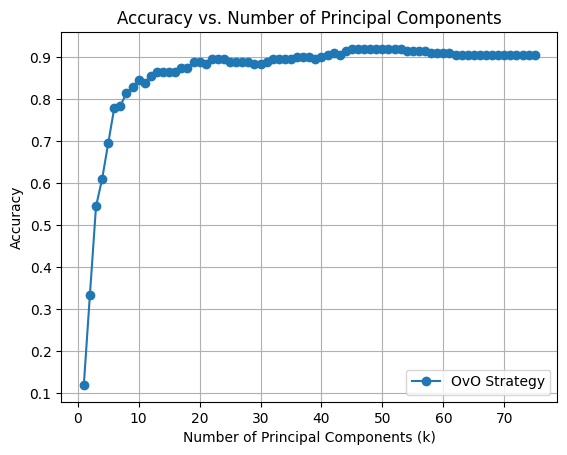

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

# 1. Scaling the data
scaler = StandardScaler()
Train_scaled = scaler.fit_transform(Train)
Test_scaled = scaler.transform(Test)

# Lists to store accuracies
accuracies_ovo = []

# Maximum value for k to iterate over
max_k = 75

for k in range(1, max_k + 1):

    # 2. Apply KernelPCA
    kpca = KernelPCA(n_components=k, kernel='linear')  # adjust the kernel as needed
    reduced_train = kpca.fit_transform(Train_scaled)
    reduced_test = kpca.transform(Test_scaled)

    # 3. SVM Training with OvO Strategy
    clf_ovo = OneVsOneClassifier(SVC(kernel='linear'))
    clf_ovo.fit(reduced_train, Y_train)

    # 4. Predict on Reduced Test Data
    predictions_ovo = clf_ovo.predict(reduced_test)

    # 5. Calculate Accuracy
    accuracy_ovo = np.sum(predictions_ovo == Y_test) / len(Y_test)
    accuracies_ovo.append(accuracy_ovo)

# Plotting the accuracies
plt.plot(range(1, max_k + 1), accuracies_ovo, label="OvO Strategy", marker='o')
plt.xlabel("Number of Principal Components (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Principal Components")
plt.legend()
plt.grid(True)
plt.show()


#Extra Credit:

The covariance captures the relationship betwen two variables. Y_train, happens to be just one single column or one variable, the covariance matrix simplifies to the variance which is in this case a 1x1 scalar value.

In [ ]:
import numpy as np

# Compute variance for Y_train
variance_Y_train = np.var(Y_train)
print(variance_Y_train)


133.25
